In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
celltypes_names = ['B_cell',
 'DC',
 'Endothelial',
 'Fibroblast',
 'Granulocyte',
 'Malignant_bladder',
 'Mast',
 'MoMac',
 'Plasma',
 'Smooth_muscle',
 'T_NK']

In [6]:
ids_samples = ['CH_B_001b_vbu',
 'CH_B_002b_vbu',
 'CH_B_003b_vbu',
 'CH_B_004b_vbu',
 'CH_B_006b_vis',
 'CH_B_008b_vis',
 'CH_B_009b_vis',
 'CH_B_010a_vis',
 'CH_B_011a_vis',
 'CH_B_013a_vis',
 'CH_B_016a_vis',
 'CH_B_019a_vis',
 'CH_B_020a_vis',
 'CH_B_022a_vis',
 'CH_B_023a_vis',
 'CH_B_025a_vis',
 'CH_B_027a_vis',
 'CH_B_029a_vis',
 'CH_B_030a_vis',
 'CH_B_031a_vis',
 'CH_B_032a_vis',
 'CH_B_033a_vbu',
 'CH_B_034a_vis',
 'CH_B_035a_vis',
 'CH_B_036a_vis',
 'CH_B_037a_vis',
 'CH_B_039a_vis',
 'CH_B_041a_vbu',
 'CH_B_044a_vbu',
 'CH_B_045a_vis',
 'CH_B_046a_vis',
 'CH_B_047a_vbu',
 'CH_B_050a_vis',
 'CH_B_052a_vis',
 'CH_B_053a_vbu',
 'CH_B_054a_vbu',
 'CH_B_055a_vis',
 'CH_B_056a_vis',
 'CH_B_057a_vis',
 'CH_B_058a_vis',
 'CH_B_059a_vis',
 'CH_B_060a_vis',
 'CH_B_062a_vis',
 'CH_B_063a_vis',
 'CH_B_064a_vis',
 'CH_B_066a_vis',
 'CH_B_067a_vis',
 'CH_B_068a_vis',
 'CH_B_069a_vis',
 'CH_B_070a_vis',
 'CH_B_071a_vis',
 'CH_B_072a_vis',
 'CH_B_073a_vis',
 'CH_B_074a_vis',
 'CH_B_075a_vis',
 'CH_B_076a_vis',
 'CH_B_077a_vis',
 'CH_B_078a_vis',
 'CH_B_079a_vis',
 'CH_B_080a_vis',
 'CH_B_082a_vis',
 'CH_B_083a_vis',
 'CH_B_084a_vis',
 'CH_B_085a_vis',
 'CH_B_086a_vis',
 'CH_B_087a_vis',
 'CH_B_088a_vis',
 'CH_B_090a_vis',
 'CH_B_092a_vis',
 'CH_B_093a_vis',
 'CH_B_094a_vis',
 'CH_B_095a_vis',
 'CH_B_096a_vis',
 'CH_B_097a_vis']
len(ids_samples)

74

In [6]:
data = np.zeros((11,5))

In [7]:
fpapth = "/home/owkin/project/cytocommunity_results/unsupervised/2024-11-05_13-50-50/crossval/Time1/Fold1/ClusterAssignMatrix1_0.csv"
df = pd.read_csv(fpapth, header=None)
df.columns = [1, 2, 3, 4, 5]
max_columns = df.idxmax(axis=1).tolist()
print(len(max_columns))
decfract = np.load("/home/owkin/project/cytocommunity_results/unsupervised/chuv/CH_B_001b_vbu_DeconvolutionFrac.npy")
decfract.shape

4988


(2650, 11)

In [8]:
src_dir = "/home/owkin/project/cytocommunity_results/unsupervised/2024-11-05_13-50-50/visualizations/ResultTable_File"
filename_all = os.listdir(src_dir)
filename_all = [elem for elem in filename_all if elem.endswith(".csv")]
n_samples = len(filename_all)
n_celltypes = len(celltypes_names)
tcn_freqs = np.zeros((n_samples, 5))
for sample_num, fn in enumerate(filename_all):
    fpath_current = os.path.join(src_dir, fn)
    df = pd.read_csv(fpath_current)
    TCN_Label = df["TCN_Label"].tolist()
    n_spots = df.shape[0]
    for tcn_num in range(5):
        tcn_freqs[sample_num, tcn_num] = TCN_Label.count(tcn_num+1) / n_spots
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate some sample data
np.random.seed(10)

# Create a figure and axis
plt.figure(figsize=(6, 6))

# Create the boxplot
sns.boxplot(data=tcn_freqs, whis=[5, 95], showfliers=False)

# Add scatter plot (stripplot) on top of the boxplot
sns.stripplot(data=tcn_freqs, color='black', alpha=0.5, jitter=0.3)
plt.xticks(ticks=range(5), labels=["1", "2", "3", "4", "5"])

# Customize plot
plt.xlabel("TCN")
plt.ylabel("Frequency")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/home/owkin/project/cytocommunity_results/unsupervised/2024-11-05_13-50-50/visualizations/ResultTable_File'

In [16]:
dir_tcn = "/home/owkin/project/cytocommunity_results/unsupervised/2024-11-06_10-17-29/ensemble/ImageCollection"
dir_decfrac = "/home/owkin/project/cytocommunity_results/unsupervised/chuv"
n_tcns = 10
nonzero_counts_per_tcn = np.zeros(n_tcns)
enrichment_scores = np.zeros((11, n_tcns))
for sample_id in ids_samples:
    fpath = os.path.join(dir_tcn, sample_id, "TCNLabel_MajorityVoting.csv")
    df_tcn = pd.read_csv(fpath)
    fpath = os.path.join(dir_decfrac, f"{sample_id}_DeconvolutionFrac.npy")
    decfrac_sample = np.load(fpath)

    for tcn_num in range(n_tcns):
        # +1 because python indexing starts at 0 but tcn indexing starts at 1
        ids_spots = df_tcn[df_tcn.eq(tcn_num+1)].any(axis=1).index[df_tcn.eq(tcn_num+1).any(axis=1)].tolist()
        if len(ids_spots)>0:
            df_decfrac_tcn = decfrac_sample[ids_spots,:]
            df_decfract_tcn_mean = np.mean(df_decfrac_tcn, axis=0)
            enrichment_scores[:,tcn_num] += df_decfract_tcn_mean
            nonzero_counts_per_tcn[tcn_num] += 1

# Normalize according to the number of patients for which each TCN is present
enrichment_scores = enrichment_scores / nonzero_counts_per_tcn
enrichment_scores = np.nan_to_num(enrichment_scores, nan=0.0)

In [17]:
enrichment_scores

array([[0.02716597, 0.02666742, 0.02701938, 0.02511507, 0.02636916,
        0.02585126, 0.02530659, 0.02700231, 0.02423568, 0.02458124],
       [0.03076973, 0.03008926, 0.0303653 , 0.02969118, 0.03066845,
        0.02990104, 0.02946069, 0.0285686 , 0.02747949, 0.02668275],
       [0.05100398, 0.05001967, 0.05075195, 0.04700516, 0.04944278,
        0.04823551, 0.04886538, 0.04611153, 0.05557775, 0.04807722],
       [0.17047824, 0.16761276, 0.17314258, 0.1668738 , 0.16814639,
        0.16758217, 0.16955454, 0.17176746, 0.17312389, 0.17308179],
       [0.02725402, 0.02737498, 0.02758971, 0.02600014, 0.02475664,
        0.0259043 , 0.02403498, 0.02330472, 0.02101354, 0.0225404 ],
       [0.41849892, 0.42518145, 0.41426536, 0.42889849, 0.42421021,
        0.4280986 , 0.42678076, 0.42974845, 0.42957941, 0.42689564],
       [0.01913536, 0.01931167, 0.01922062, 0.01755776, 0.01842871,
        0.01864009, 0.01827468, 0.01788274, 0.0167859 , 0.01652185],
       [0.04784826, 0.04800852, 0.0480599

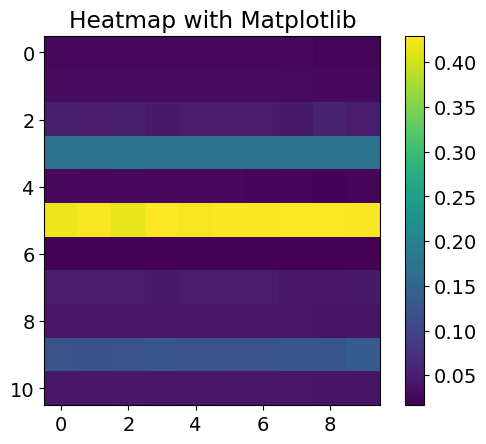

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Example NumPy array
data = np.random.rand(10, 10)  # 10x10 array with random values

# Create the heatmap
plt.imshow(enrichment_scores, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Add a color bar to show the scale
plt.title("Heatmap with Matplotlib")
plt.show()


# Learning curves

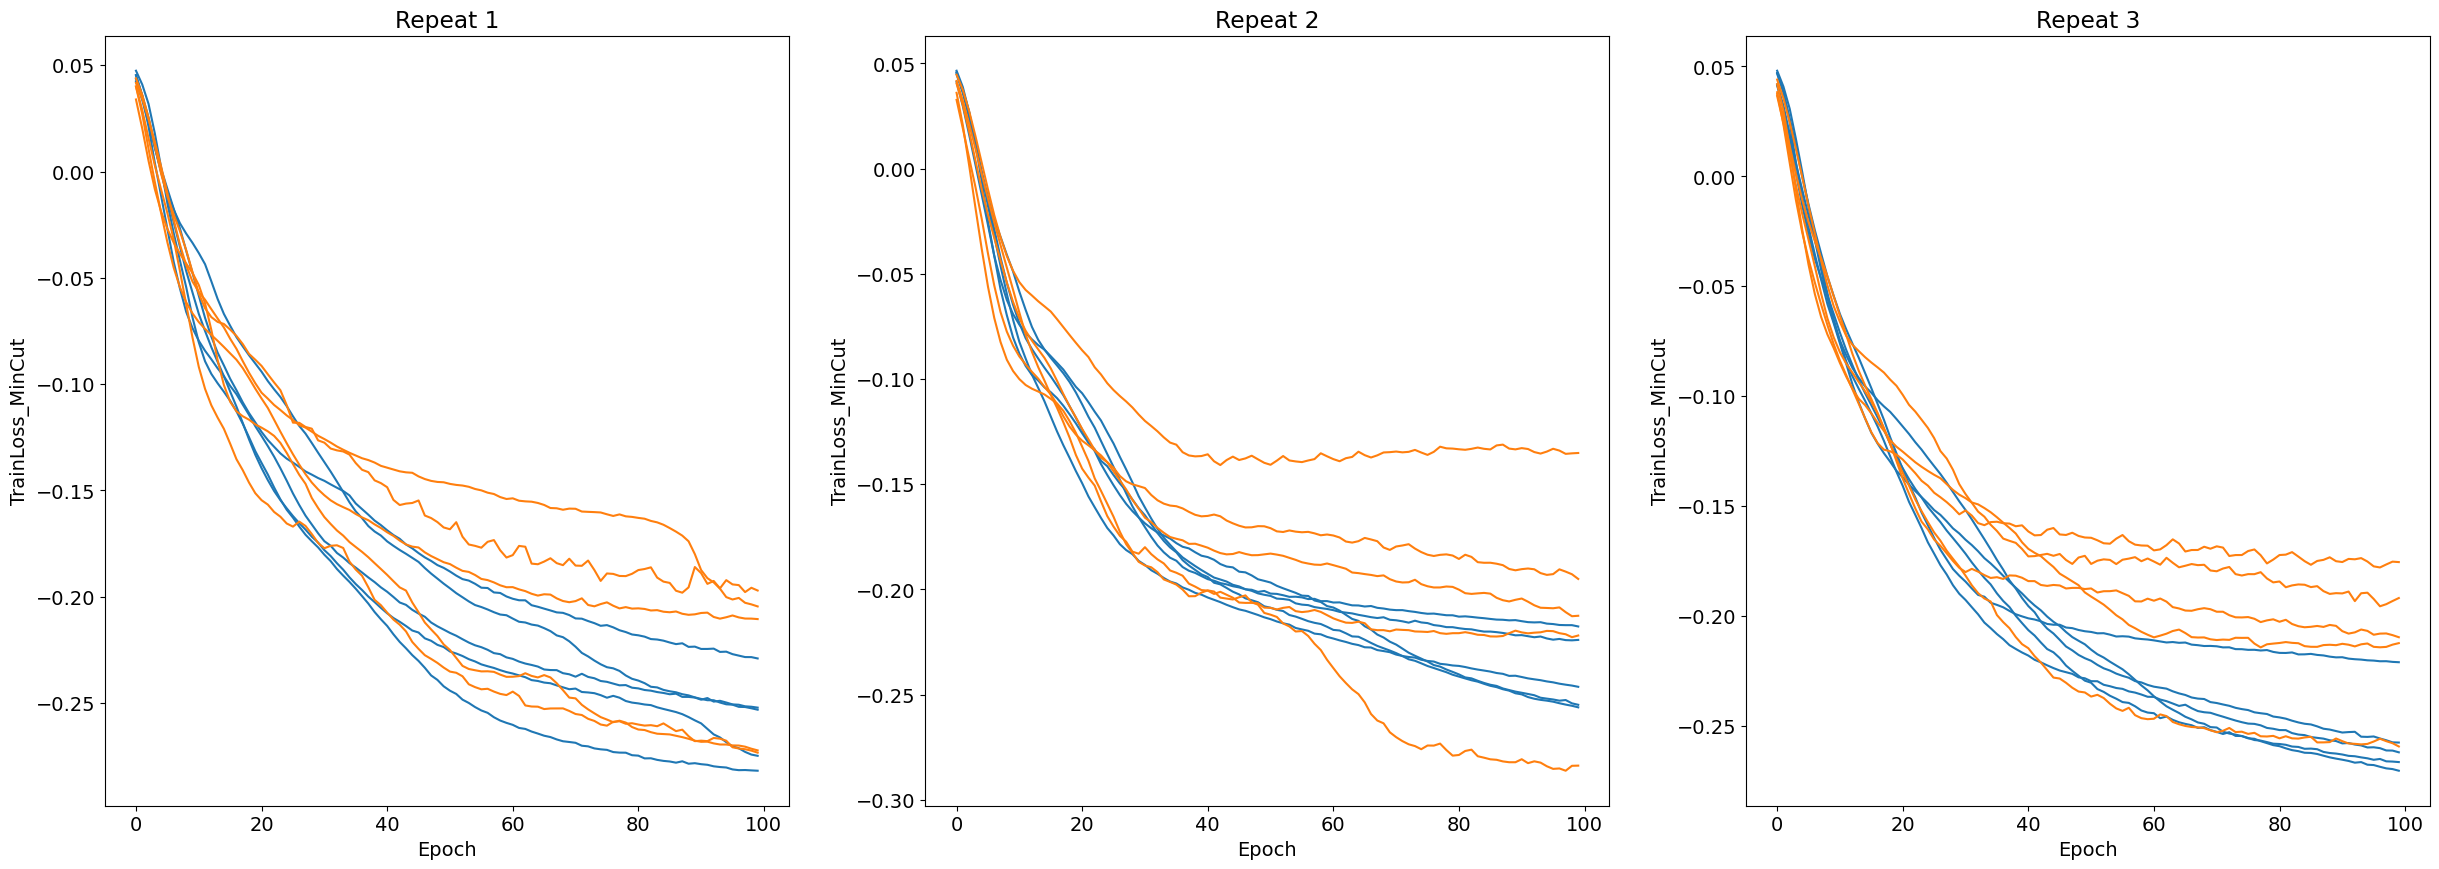

In [3]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(30,10))

timestamp = "2024-11-05_13-50-50"

for time in range(3):
    plt.subplot(1,3,time+1)
    plt.title(f"Repeat {time+1}")
    for fold in range(5):
        fpath = f"/home/owkin/project/cytocommunity_results/unsupervised/{timestamp}/crossval/Time{time+1}/Fold{fold+1}/Epoch_TrainLoss.csv"
        df = pd.read_csv(fpath)
        TrainLoss_MinCut = df["TrainLoss_MinCut"].tolist()
        plt.plot(TrainLoss_MinCut, label=f"Fold {fold+1}", color="tab:blue")
        plt.xlabel("Epoch")
        plt.ylabel("TrainLoss_MinCut")

    for fold in range(5):
        fpath = f"/home/owkin/project/cytocommunity_results/unsupervised/{timestamp}/crossval/Time{time+1}/Fold{fold+1}/Epoch_TrainLoss.csv"
        df = pd.read_csv(fpath)
        TestLoss_MinCut = df["TestLoss_MinCut"].tolist()
        plt.plot(TestLoss_MinCut, label=f"Fold {fold+1}", color="tab:orange")
        plt.xlabel("Epoch")
        plt.ylabel("TrainLoss_MinCut")
        

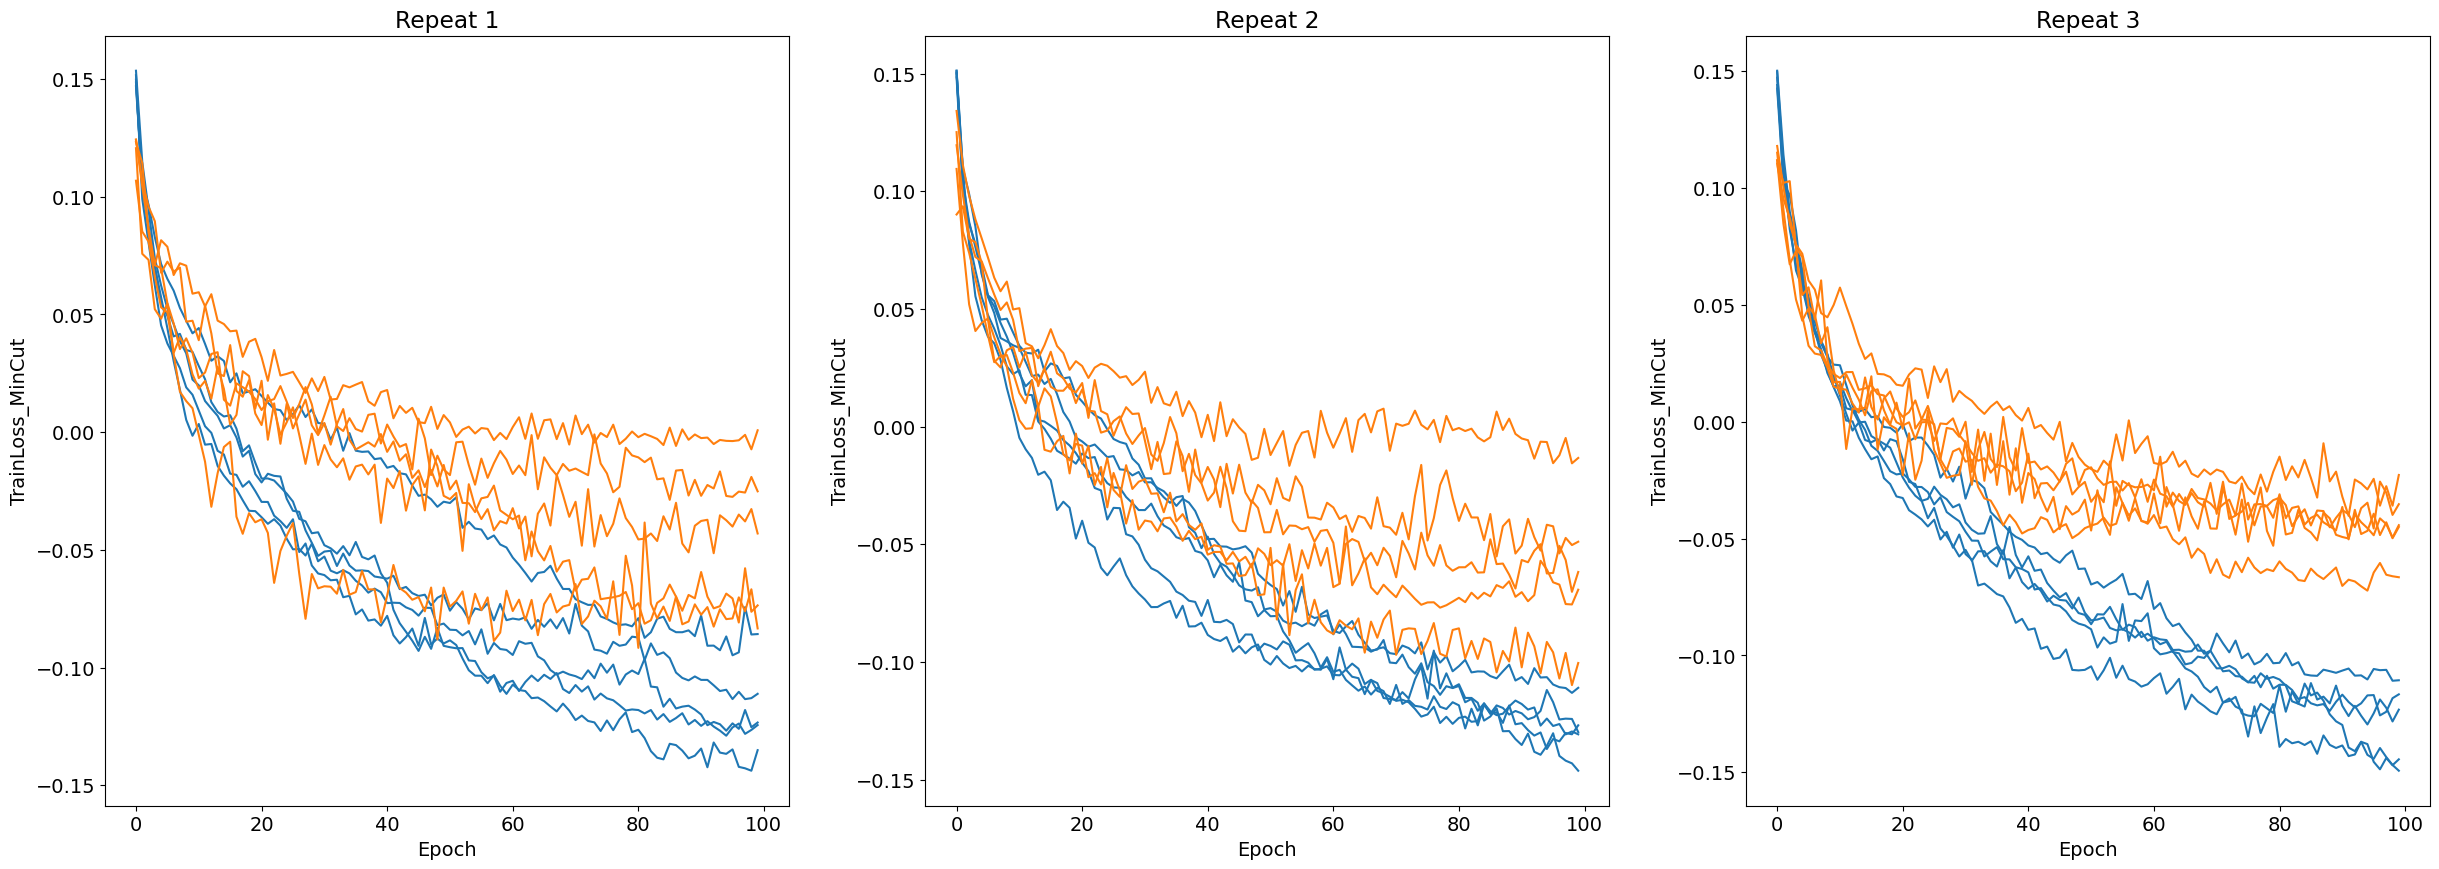

In [3]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(30,10))

timestamp = "2024-11-06_10-17-29"

for time in range(3):
    plt.subplot(1,3,time+1)
    plt.title(f"Repeat {time+1}")
    for fold in range(5):
        fpath = f"/home/owkin/project/cytocommunity_results/unsupervised/{timestamp}/crossval/Time{time+1}/Fold{fold+1}/Epoch_TrainLoss.csv"
        df = pd.read_csv(fpath)
        TrainLoss_MinCut = df["TrainLoss_MinCut"].tolist()
        plt.plot(TrainLoss_MinCut, label=f"Fold {fold+1}", color="tab:blue")
        plt.xlabel("Epoch")
        plt.ylabel("TrainLoss_MinCut")

    for fold in range(5):
        fpath = f"/home/owkin/project/cytocommunity_results/unsupervised/{timestamp}/crossval/Time{time+1}/Fold{fold+1}/Epoch_TrainLoss.csv"
        df = pd.read_csv(fpath)
        TestLoss_MinCut = df["TestLoss_MinCut"].tolist()
        plt.plot(TestLoss_MinCut, label=f"Fold {fold+1}", color="tab:orange")
        plt.xlabel("Epoch")
        plt.ylabel("TrainLoss_MinCut")
        